In [2]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from MACD_BOLLStrategy import MACD_BOLLStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [3]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [4]:
def run_backtest(config, trading_data, ohlc_data, short_window, delta_window, window, a):
    short_window = int(short_window)
    long_window = short_window + int(delta_window)
    window = int(window)
    config['title'] = "MACD_BOLLStrategy" + "_" +  str(short_window) + "_" + str(long_window) + "_" + str(window) + "_" + str(a)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = MACD_BOLLStrategy(config, events_queue, data_handler,
                            short_window=short_window, long_window=long_window,
                            window = window, a = a)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "short_window": [short_window],
    #     "long_window": [long_window],
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [5]:
def f(params):
    config = {
        "csv_dir": "C:/backtest/Binance",
        "out_dir": "C:/backtest/results/MACD_BOLLStrategy",
        "title": "MACD_BOLLStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
        "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
        "equity": 1.0,
        "freq": 60,      # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,     # None or a value
        "max_quantity": None,           # None or a value, Maximum purchase quantity
        "min_quantity": None,           # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,      # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    short_window = params['short_window']
    delta_window = params['delta_window']
    window = params['window']
    a = params['a']
    val = run_backtest(config, trading_data, ohlc_data, short_window, delta_window, window, a)
    return {'loss': val, 'status': STATUS_OK}

In [6]:
space = {
    'short_window': hp.randint('short_window', 120),
    'delta_window': hp.randint('delta_window', 120),
    'window': hp.randint('window', 240),
    'a': hp.uniform('a', 0.1, 3)
}

In [7]:
# print(hyperopt.pyll.stochastic.sample(space))

In [8]:
trials = Trials()

In [9]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=250, trials=trials)

---------------------------------
MACD_BOLLStrategy_36_116_206_2.4504471388926636
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9171859441
Max Drawdown: 48.1438116562
Max Drawdown Duration: 2510
Total Returns: 0.3349281140
---------------------------------
Trades: 4
Trade Winning: 75%
Average Trade: 12.37%
Average Win: 25.37%
Average Loss: -26.64%
Best Trade: 65.52%
Worst Trade: -26.64%
Worst Trade Date: 10 days 22:00:00
Avg Days in Trade: 17 days 05:00:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_8_77_236_1.7490230180361517
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
----------------

---------------------------------
MACD_BOLLStrategy_68_92_80_0.9059643172298792
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5490155622
Max Drawdown: 43.9159427800
Max Drawdown Duration: 2510
Total Returns: 0.8756852870
---------------------------------
Trades: 12
Trade Winning: 50%
Average Trade: 8.24%
Average Win: 25.54%
Average Loss: -9.05%
Best Trade: 88.37%
Worst Trade: -15.52%
Worst Trade Date: 2 days 13:00:00
Avg Days in Trade: 7 days 08:25:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_90_109_69_2.526653034551856
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3575385788
Max Drawdown: 49.0635791696
Max Drawdown Duration: 2510
Total Returns: 0.7062884905
---------------------------------
Trades: 11
Trade Winning: 45%
Average Trade: 10.22%
Average Win: 33.39%
Average Loss: -9.08%
Best Trade: 139.51%
Worst Trade: -16.02%
Worst Trade Date: 3 days 01:00:00
Avg Days in Trade: 8 days 04:32:44
---------------------------------
---------------------------------
MACD_BOLLStrategy_12_78_105_0.7579973477257549
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9483404393
Max Drawdown: 55.0560450108
Max Drawdown Duration: 2736
Total Returns: 0.3767916157
--------------------------------

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2626118911
Max Drawdown: 46.9991203942
Max Drawdown Duration: 2510
Total Returns: 0.5656001145
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 11.93%
Average Win: 47.40%
Average Loss: -9.35%
Best Trade: 127.12%
Worst Trade: -18.40%
Worst Trade Date: 3 days 01:00:00
Avg Days in Trade: 9 days 20:15:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_56_141_239_1.521928092072269
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4536169927
Max Drawdown: 40.8861283466
M

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2051389238
Max Drawdown: 47.1657179148
Max Drawdown Duration: 2510
Total Returns: 0.5106495518
---------------------------------
Trades: 7
Trade Winning: 43%
Average Trade: 11.55%
Average Win: 41.01%
Average Loss: -10.54%
Best Trade: 108.62%
Worst Trade: -15.75%
Worst Trade Date: 3 days 05:00:00
Avg Days in Trade: 10 days 18:17:09
---------------------------------
---------------------------------
MACD_BOLLStrategy_16_116_74_2.7226838779994136
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0297969245
Max Drawdown: 29.6850952905

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7381900994
Max Drawdown: 60.0978983576
Max Drawdown Duration: 2736
Total Returns: 0.2314362547
---------------------------------
Trades: 11
Trade Winning: 55%
Average Trade: 3.65%
Average Win: 16.00%
Average Loss: -11.17%
Best Trade: 51.57%
Worst Trade: -17.77%
Worst Trade Date: 4 days 06:00:00
Avg Days in Trade: 6 days 01:38:11
---------------------------------
---------------------------------
MACD_BOLLStrategy_108_121_4_2.9611503967788666
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Tr

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5292709289
Max Drawdown: 47.4118633738
Max Drawdown Duration: 2510
Total Returns: 0.8156969082
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 14.32%
Average Win: 54.26%
Average Loss: -9.65%
Best Trade: 132.12%
Worst Trade: -18.43%
Worst Trade Date: 2 days 19:00:00
Avg Days in Trade: 10 days 07:45:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_57_84_62_1.5826422143899164
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3290459410
Max Drawdown: 50.3952371192
M

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0580892818
Max Drawdown: 30.9806209281
Max Drawdown Duration: 941
Total Returns: 1.4534883734
---------------------------------
Trades: 25
Trade Winning: 52%
Average Trade: 4.48%
Average Win: 12.95%
Average Loss: -4.70%
Best Trade: 32.84%
Worst Trade: -9.73%
Worst Trade Date: 0 days 22:00:00
Avg Days in Trade: 3 days 08:38:24
---------------------------------
---------------------------------
MACD_BOLLStrategy_19_63_14_0.3986358272040047
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7617768742
Max Drawdown: 34.5856739876
Max Drawdown Duration: 941
Total Returns: 1.1124272455
---------------------------------
Trad

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7091845934
Max Drawdown: 39.7669214933
Max Drawdown Duration: 2510
Total Returns: 0.9543988029
---------------------------------
Trades: 7
Trade Winning: 43%
Average Trade: 16.69%
Average Win: 51.41%
Average Loss: -9.35%
Best Trade: 126.35%
Worst Trade: -10.28%
Worst Trade Date: 2 days 09:00:00
Avg Days in Trade: 11 days 07:25:43
---------------------------------
---------------------------------
MACD_BOLLStrategy_54_126_91_0.9225068657488947
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9666620626
Max Drawdown: 45.0804783331
Max Drawdown Duration: 2510
Total Returns: 1.2363579761
--------------------------------

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0003190692
Max Drawdown: 34.8215395253
Max Drawdown Duration: 2510
Total Returns: 1.2261168275
---------------------------------
Trades: 7
Trade Winning: 43%
Average Trade: 18.80%
Average Win: 53.68%
Average Loss: -7.37%
Best Trade: 129.95%
Worst Trade: -10.34%
Worst Trade Date: 3 days 16:00:00
Avg Days in Trade: 11 days 09:34:17
---------------------------------
---------------------------------
MACD_BOLLStrategy_14_103_107_0.10090968246729015
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8968015444
Max Drawdown: 31.702960188

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0674093955
Max Drawdown: 44.8734392290
Max Drawdown Duration: 2510
Total Returns: 0.4340649399
---------------------------------
Trades: 6
Trade Winning: 50%
Average Trade: 10.43%
Average Win: 32.09%
Average Loss: -11.23%
Best Trade: 83.18%
Worst Trade: -12.31%
Worst Trade Date: 6 days 05:00:00
Avg Days in Trade: 12 days 04:20:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_58_97_126_0.42487382658442235
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6491970852
Max Drawdown: 47.4926187188

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3360982546
Max Drawdown: 43.9229787316
Max Drawdown Duration: 2510
Total Returns: 0.6338926084
---------------------------------
Trades: 8
Trade Winning: 38%
Average Trade: 9.82%
Average Win: 37.20%
Average Loss: -6.61%
Best Trade: 86.39%
Worst Trade: -16.28%
Worst Trade Date: 2 days 20:00:00
Avg Days in Trade: 9 days 23:45:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_19_93_0_1.0740570860879375
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5351080699
Max Drawdown: 61.5900858977
Max D

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5354080419
Max Drawdown: 39.0206414704
Max Drawdown Duration: 2510
Total Returns: 0.7519019609
---------------------------------
Trades: 6
Trade Winning: 50%
Average Trade: 16.67%
Average Win: 45.10%
Average Loss: -11.77%
Best Trade: 117.23%
Worst Trade: -13.04%
Worst Trade Date: 2 days 07:00:00
Avg Days in Trade: 12 days 01:30:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_94_207_133_0.2351956341149109
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3095876171
Max Drawdown: 48.709596926

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6041136928
Max Drawdown: 53.8411997389
Max Drawdown Duration: 2510
Total Returns: 0.1537493094
---------------------------------
Trades: 62
Trade Winning: 35%
Average Trade: 0.70%
Average Win: 8.47%
Average Loss: -3.57%
Best Trade: 32.00%
Worst Trade: -10.41%
Worst Trade Date: 0 days 03:00:00
Avg Days in Trade: 1 days 08:32:54
---------------------------------
---------------------------------
MACD_BOLLStrategy_90_197_25_0.8193599320851676
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1093266696
Max Drawdown: 49.1788424406
Max

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4693884212
Max Drawdown: 53.5455584143
Max Drawdown Duration: 2510
Total Returns: 0.7754757102
---------------------------------
Trades: 8
Trade Winning: 62%
Average Trade: 13.62%
Average Win: 30.35%
Average Loss: -14.26%
Best Trade: 125.33%
Worst Trade: -24.20%
Worst Trade Date: 3 days 23:00:00
Avg Days in Trade: 10 days 20:37:30
---------------------------------
---------------------------------
MACD_BOLLStrategy_116_182_177_0.8498041367353267
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3521076001
Max Drawdown: 39.04543979

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3298969661
Max Drawdown: 42.7529010216
Max Drawdown Duration: 2736
Total Returns: 0.6584130511
---------------------------------
Trades: 34
Trade Winning: 38%
Average Trade: 2.02%
Average Win: 10.73%
Average Loss: -3.37%
Best Trade: 20.89%
Worst Trade: -7.80%
Worst Trade Date: 0 days 10:00:00
Avg Days in Trade: 2 days 10:54:42
---------------------------------
---------------------------------
MACD_BOLLStrategy_95_183_10_1.0313239308970572
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2566907067
Max Drawdown: 48.9339126317
Max Drawdown Duration: 2510
Total Returns: 0.5937812155
---------------------------------
T

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.4575946532
Max Drawdown: 29.9412816160
Max Drawdown Duration: 1001
Total Returns: 1.9344416222
---------------------------------
Trades: 20
Trade Winning: 55%
Average Trade: 6.42%
Average Win: 14.82%
Average Loss: -3.84%
Best Trade: 33.88%
Worst Trade: -6.60%
Worst Trade Date: 0 days 15:00:00
Avg Days in Trade: 4 days 04:21:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_38_156_213_0.10152554619088683
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6467924244
Max Drawdown: 50.1340976448
Max Drawdown Duration: 2510
Total Returns: 0.9142535437
---------------------------------

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9757454548
Max Drawdown: 49.4765984554
Max Drawdown Duration: 2510
Total Returns: 0.3898825849
---------------------------------
Trades: 9
Trade Winning: 33%
Average Trade: 7.18%
Average Win: 38.03%
Average Loss: -8.25%
Best Trade: 89.52%
Worst Trade: -13.66%
Worst Trade Date: 3 days 11:00:00
Avg Days in Trade: 9 days 04:40:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_4_60_237_0.9139990917924314
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5496155741
Max Drawdown: 41.8827369412
Max 

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.4444925712
Max Drawdown: 62.8698705186
Max Drawdown Duration: 2510
Total Returns: 0.0584906651
---------------------------------
Trades: 33
Trade Winning: 45%
Average Trade: 0.99%
Average Win: 9.76%
Average Loss: -6.32%
Best Trade: 42.46%
Worst Trade: -21.17%
Worst Trade Date: 0 days 15:00:00
Avg Days in Trade: 2 days 11:09:05
---------------------------------
---------------------------------
MACD_BOLLStrategy_13_55_72_0.8839533552721752
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0621636371
Max Drawdown: 29.8499791614
Max Drawdown Duration: 1062
Total Returns: 1.4085268535
---------------------------------
Tr

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7913669697
Max Drawdown: 52.6363219398
Max Drawdown Duration: 2510
Total Returns: 0.2662780139
---------------------------------
Trades: 8
Trade Winning: 25%
Average Trade: 9.13%
Average Win: 65.46%
Average Loss: -9.64%
Best Trade: 122.82%
Worst Trade: -21.45%
Worst Trade Date: 3 days 11:00:00
Avg Days in Trade: 9 days 15:07:30
---------------------------------
---------------------------------
MACD_BOLLStrategy_41_74_116_0.7874146206404099
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3364283597
Max Drawdown: 50.4295388246
Max Drawdown Duration: 2736
Total Returns: 0.6690255157
---------------------------------


---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8775626760
Max Drawdown: 45.1319282785
Max Drawdown Duration: 2510
Total Returns: 1.1039204879
---------------------------------
Trades: 8
Trade Winning: 50%
Average Trade: 16.56%
Average Win: 42.26%
Average Loss: -9.13%
Best Trade: 138.64%
Worst Trade: -18.68%
Worst Trade Date: 2 days 22:00:00
Avg Days in Trade: 10 days 11:00:00
---------------------------------
---------------------------------
MACD_BOLLStrategy_25_117_56_1.5526501682079237
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3803488808
Max Drawdown: 49.0002667525
Max Drawdown Duration: 2510
Total Returns: 0.7163691850
--------------------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6341114087
Max Drawdown: 50.0073735635
Max Drawdown Duration: 2510
Total Returns: 0.8957513073
---------------------------------
Trades: 8
Trade Winning: 50%
Average Trade: 14.51%
Average Win: 39.74%
Average Loss: -10.73%
Best Trade: 126.67%
Worst Trade: -20.75%
Worst Trade Date: 2 days 23:00:00
Avg Days in Trade: 10 days 07:37:30
---------------------------------
---------------------------------
MACD_BOLLStrategy_70_151_78_2.607915304512817
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.0813750079
Max Drawdown: 66.1842234880
Max Drawdown Duration: 2510
Total Returns: -0.1715619323
------------------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4433038908
Max Drawdown: 52.5103869783
Max Drawdown Duration: 2510
Total Returns: 0.7682850013
---------------------------------
Trades: 14
Trade Winning: 21%
Average Trade: 8.26%
Average Win: 57.64%
Average Loss: -5.21%
Best Trade: 136.85%
Worst Trade: -11.22%
Worst Trade Date: 0 days 12:00:00
Avg Days in Trade: 5 days 20:38:34
---------------------------------
---------------------------------
MACD_BOLLStrategy_40_135_185_1.1014727533686388
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7155046159
Max Drawdown: 43.7607840059
Max Drawdown Duration: 2510
Total Returns: 0.9411925212
--------------------------------

In [10]:
best

{'a': 0.5319011231919033, 'delta_window': 56, 'short_window': 18, 'window': 37}

In [11]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'a': [2.4504471388926636], 'delta_window': [80], 'short_window': [36], 'window': [206]} 	 -0.3349281139836582
{'a': [1.7490230180361517], 'delta_window': [69], 'short_window': [8], 'window': [236]} 	 -0.44618498923404726
{'a': [1.663203685922437], 'delta_window': [109], 'short_window': [17], 'window': [135]} 	 -0.8027929297281517
{'a': [1.5071941279490744], 'delta_window': [87], 'short_window': [65], 'window': [115]} 	 -0.7499892647872326
{'a': [0.15849355970949025], 'delta_window': [64], 'short_window': [94], 'window': [150]} 	 -0.6642258976381263
{'a': [0.4439439606774821], 'delta_window': [73], 'short_window': [35], 'window': [1]} 	 -0.0
{'a': [1.7405999383044755], 'delta_window': [15], 'short_window': [35], 'window': [162]} 	 -0.7052666345254059
{'a': [1.7383619887425783], 'delta_window': [48], 'short_window': [21], 'window': [109]} 	 -0.8583033209852944
{'a': [2.876732191342985], 'delta_window': [86], 'short_window': [47], 'window': [102]} 	 -0.5018421282169852
{'a': [0.518724411

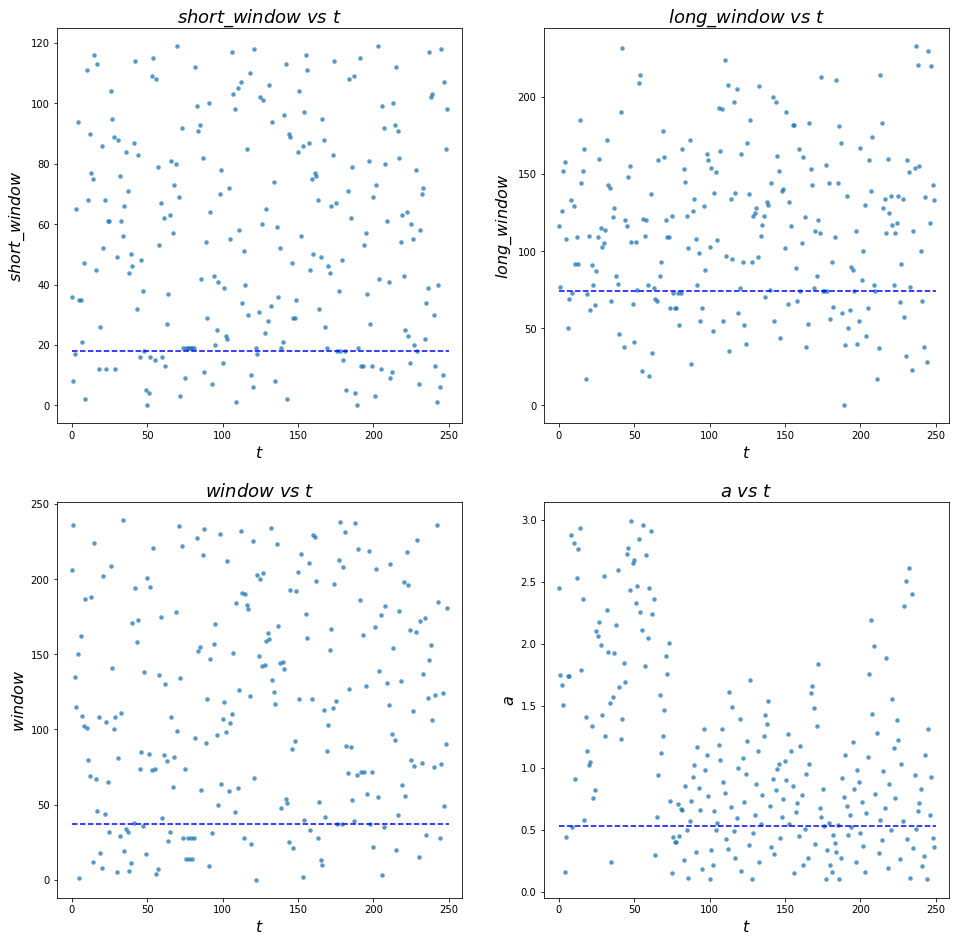

In [12]:
f, ax = plt.subplots(2, 2, figsize = (16, 16))
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['short_window'] for t in trials.trials]
ax[0,0].set_xlim(xs[0]-10, xs[-1]+10)
ax[0,0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0,0].set_title('$short\_window$ $vs$ $t$ ', fontsize=18)
ax[0,0].set_xlabel('$t$', fontsize=16)
ax[0,0].set_ylabel('$short\_window$', fontsize=16)
ax[0,0].hlines(best['short_window'], 0, 250,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [[t['misc']['vals']['delta_window'][0]+ t['misc']['vals']['short_window'][0]] for t in trials.trials]
ax[0,1].set_xlim(xs[0]-10, xs[-1]+10)
ax[0,1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0,1].set_title('$long\_window$ $vs$ $t$ ', fontsize=18)
ax[0,1].set_xlabel('$t$', fontsize=16)
ax[0,1].set_ylabel('$long\_window$', fontsize=16)
ax[0,1].hlines(best['delta_window'] + best['short_window'], 0, 250,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['window'] for t in trials.trials]
ax[1,0].set_xlim(xs[0]-10, xs[-1]+10)
ax[1,0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1,0].set_title('$window$ $vs$ $t$ ', fontsize=18)
ax[1,0].set_xlabel('$t$', fontsize=16)
ax[1,0].set_ylabel('$window$', fontsize=16)
ax[1,0].hlines(best['window'], 0, 250,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['a'] for t in trials.trials]
ax[1,1].set_xlim(xs[0]-10, xs[-1]+10)
ax[1,1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1,1].set_title('$a$ $vs$ $t$ ', fontsize=18)
ax[1,1].set_xlabel('$t$', fontsize=16)
ax[1,1].set_ylabel('$a$', fontsize=16)
ax[1,1].hlines(best['a'], 0, 250,color='blue',linestyle="--")

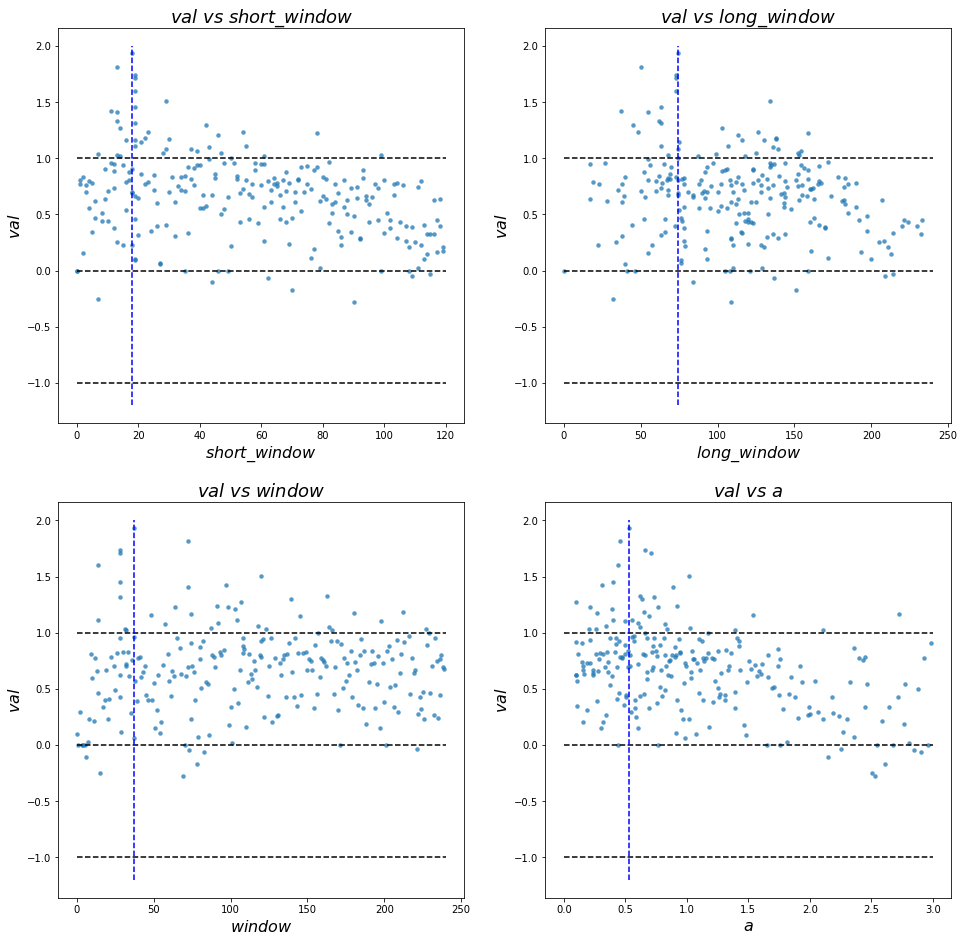

In [14]:
f, ax = plt.subplots(2,2, figsize = (16, 16))
xs = [t['misc']['vals']['short_window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0,0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0,0].set_title('$val$ $vs$ $short\_window$ ', fontsize=18)
ax[0,0].set_xlabel('$short\_window$', fontsize=16)
ax[0,0].set_ylabel('$val$', fontsize=16)
ax[0,0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0,0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0,0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0,0].vlines(best['short_window'], -1.2, 2, color='blue',linestyle="--")

xs = [[t['misc']['vals']['delta_window'][0]+ t['misc']['vals']['short_window'][0]] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0,1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0,1].set_title('$val$ $vs$ $long\_window$ ', fontsize=18)
ax[0,1].set_xlabel('$long\_window$', fontsize=16)
ax[0,1].set_ylabel('$val$', fontsize=16)
ax[0,1].hlines(0, 0, 240,color='black',linestyle="--")
ax[0,1].hlines(-1, 0, 240, color='black',linestyle="--")
ax[0,1].hlines(1, 0, 240,color='black',linestyle="--")
ax[0,1].vlines(best['delta_window'] + best['short_window'], -1.2, 2, color='blue',linestyle="--")

xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[1,0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1,0].set_title('$val$ $vs$ $window$ ', fontsize=18)
ax[1,0].set_xlabel('$window$', fontsize=16)
ax[1,0].set_ylabel('$val$', fontsize=16)
ax[1,0].hlines(0, 0, 240,color='black',linestyle="--")
ax[1,0].hlines(-1, 0, 240, color='black',linestyle="--")
ax[1,0].hlines(1, 0, 240,color='black',linestyle="--")
ax[1,0].vlines(best['window'], -1.2, 2, color='blue',linestyle="--")

xs = [t['misc']['vals']['a'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[1,1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1,1].set_title('$val$ $vs$ $a$ ', fontsize=18)
ax[1,1].set_xlabel('$a$', fontsize=16)
ax[1,1].set_ylabel('$val$', fontsize=16)
ax[1,1].hlines(0, 0, 3,color='black',linestyle="--")
ax[1,1].hlines(-1, 0, 3, color='black',linestyle="--")
ax[1,1].hlines(1, 0, 3,color='black',linestyle="--")
ax[1,1].vlines(best['a'], -1.2, 2, color='blue',linestyle="--")